**Load and explore the dataset**

In [1]:
library(dslabs)
library(tidyverse)
data(gapminder)
gapminder %>% head()
str(gapminder)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.2
✔ tibble  2.1.1     ✔ dplyr   0.8.5
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


**Compare infant mortality in Sri Lanka and Turkey in 2015**

In [2]:
gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)

country,infant_mortality
Sri Lanka,8.4
Turkey,11.6


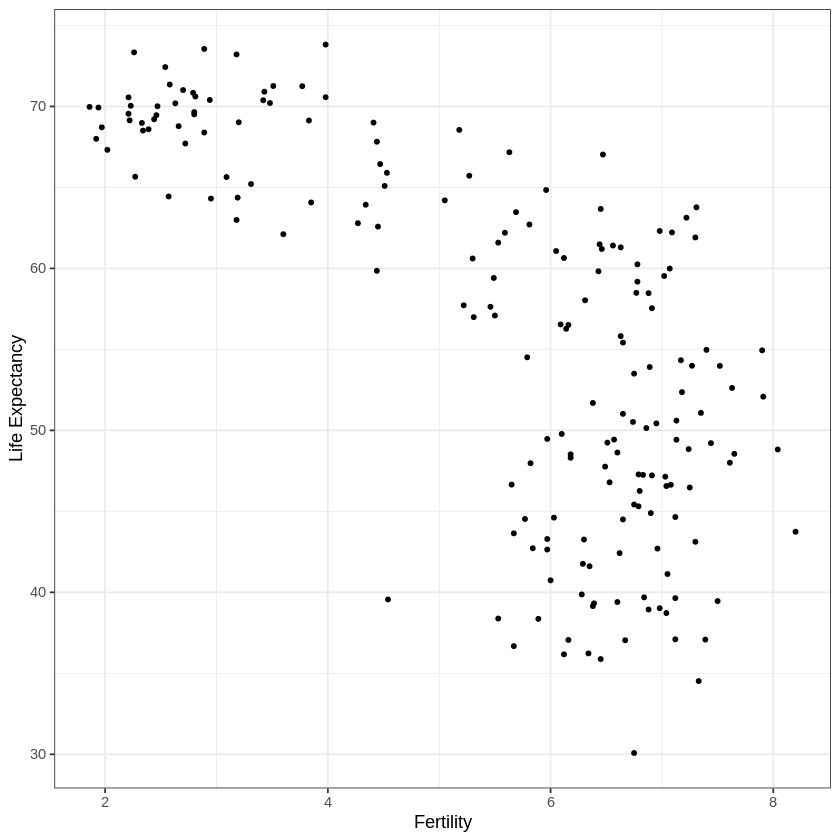

In [3]:
#basic scatterplot of life expectancy versus fertility in year 1962
ds_theme_set()
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")

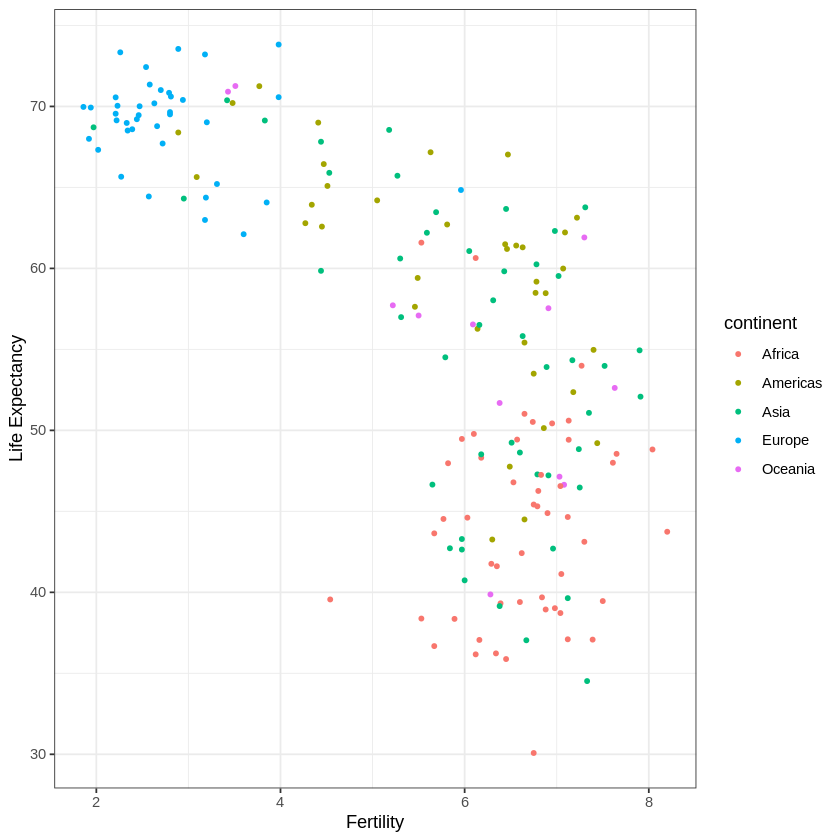

In [14]:
# Add color based on continent
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility")

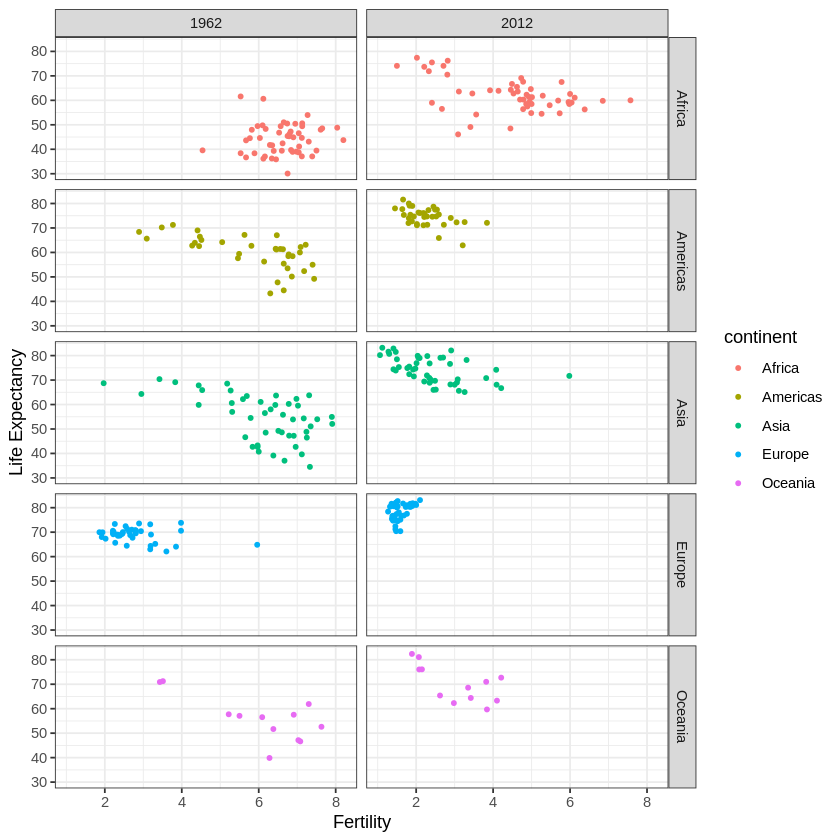

In [11]:
# Facet by continent and year
gapminder %>% filter(year %in% c("1962", "2012")) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_grid(continent ~ year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

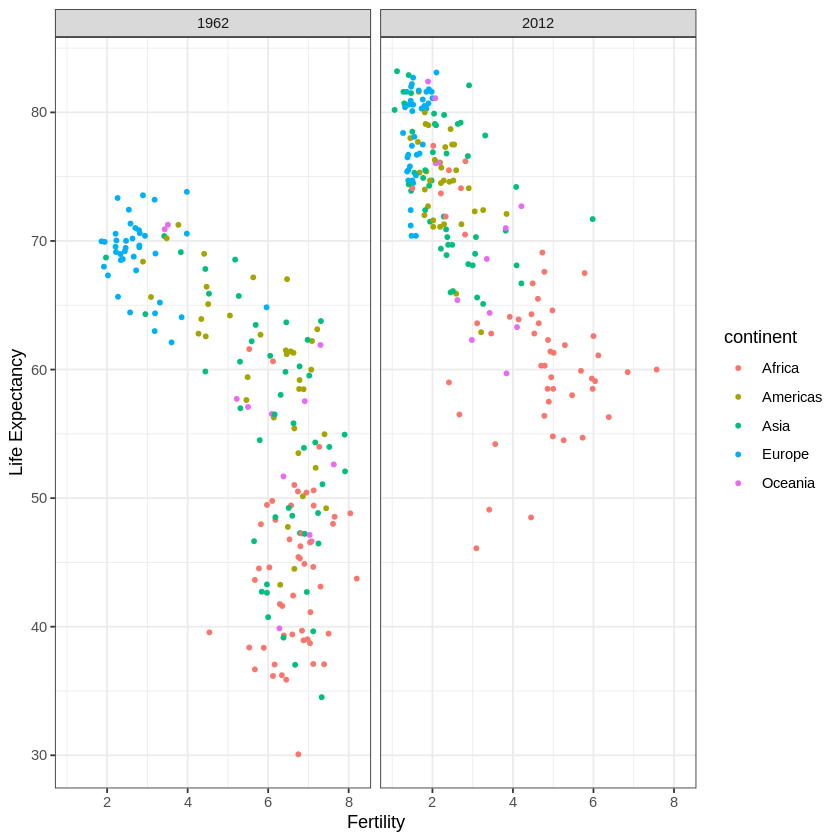

In [15]:
# Facet by year only
gapminder %>% filter(year %in% c("1962", "2012")) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_grid(.~ year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

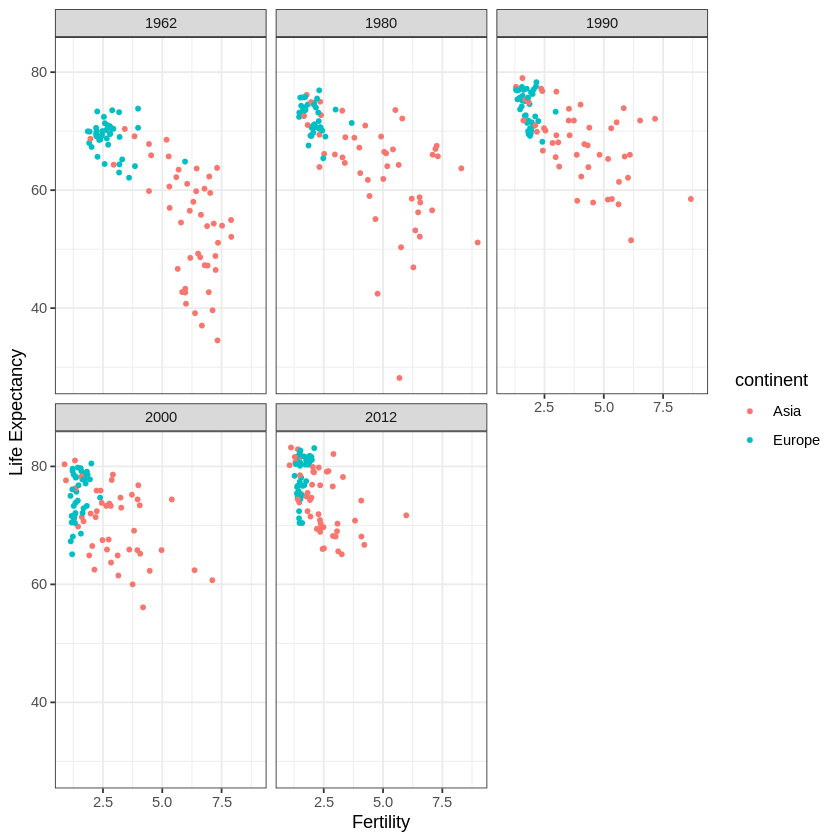

In [16]:
# facet by year, plots wrapped onto multiple rows
y <- c("1962", "1980", "1990", "2000", "2012")
c <- c("Europe", "Asia")
gapminder %>% filter(year %in% y & continent %in% c) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 1) +
    facet_wrap(~year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

Warning message:
“Removed 1 rows containing missing values (geom_point).”

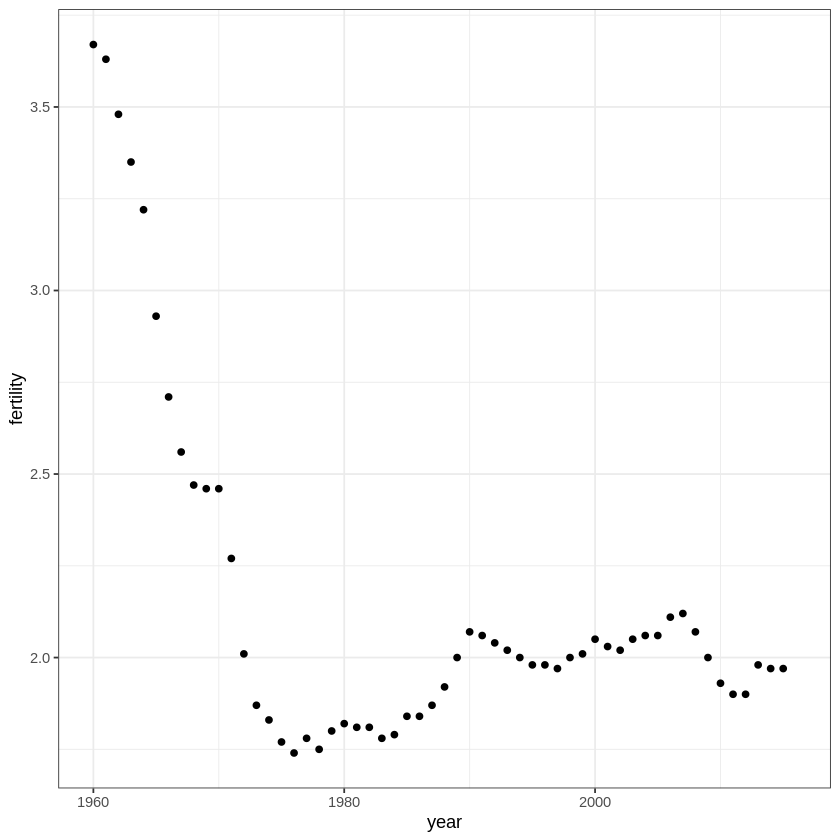

In [20]:
# scatterplot of US fertility by year
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_point()

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”

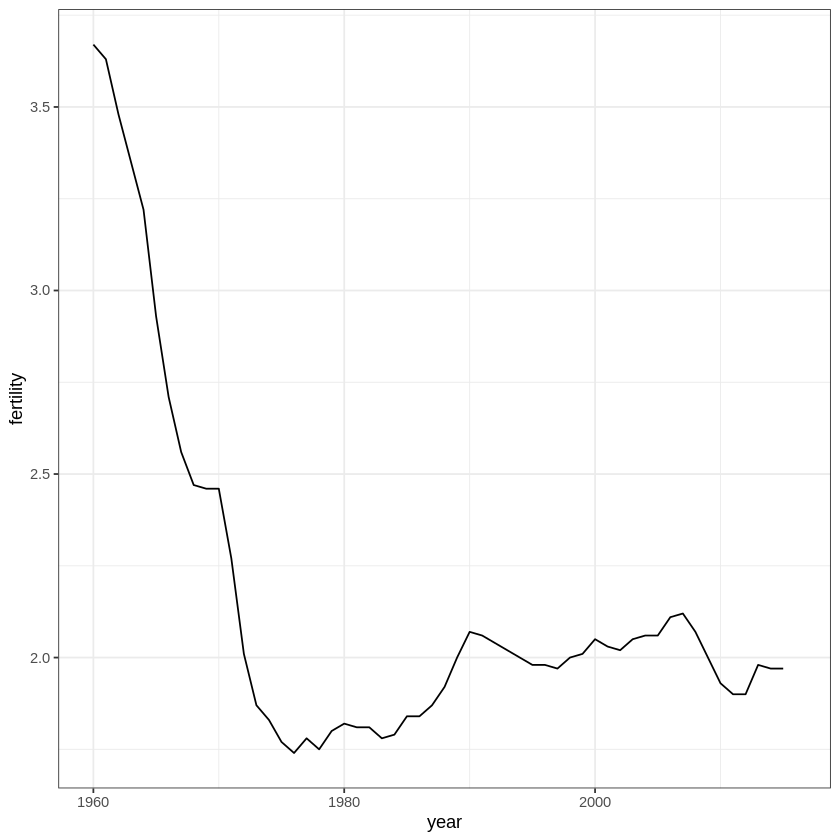

In [21]:
# line plot of US fertility by year
gapminder %>%
    filter(country == "United States") %>%
    ggplot(aes(year, fertility)) +
    geom_line()

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”

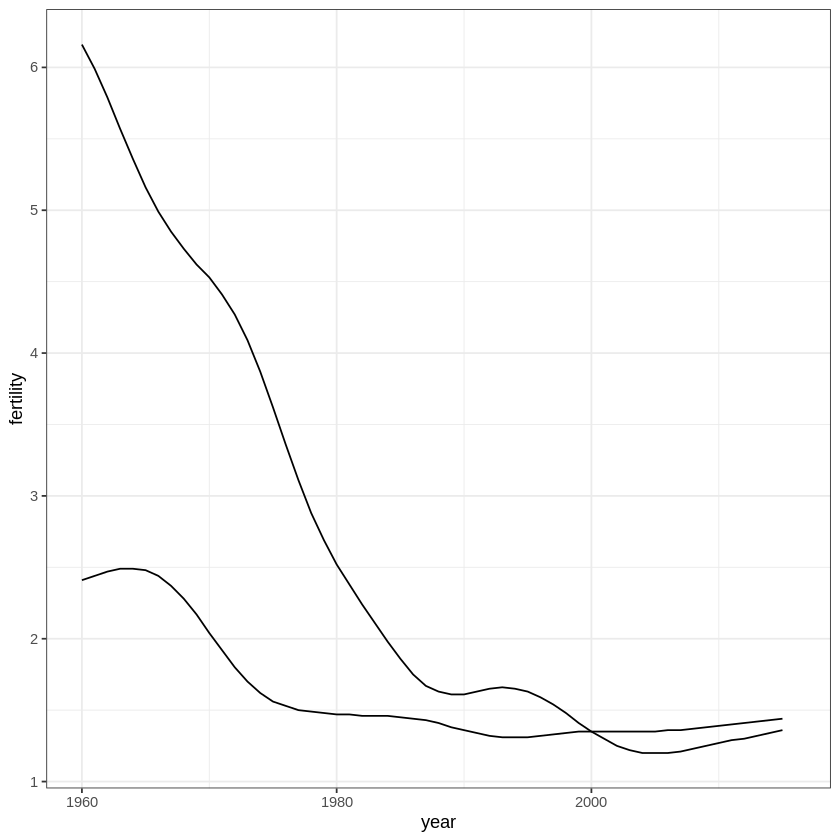

In [32]:
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line()

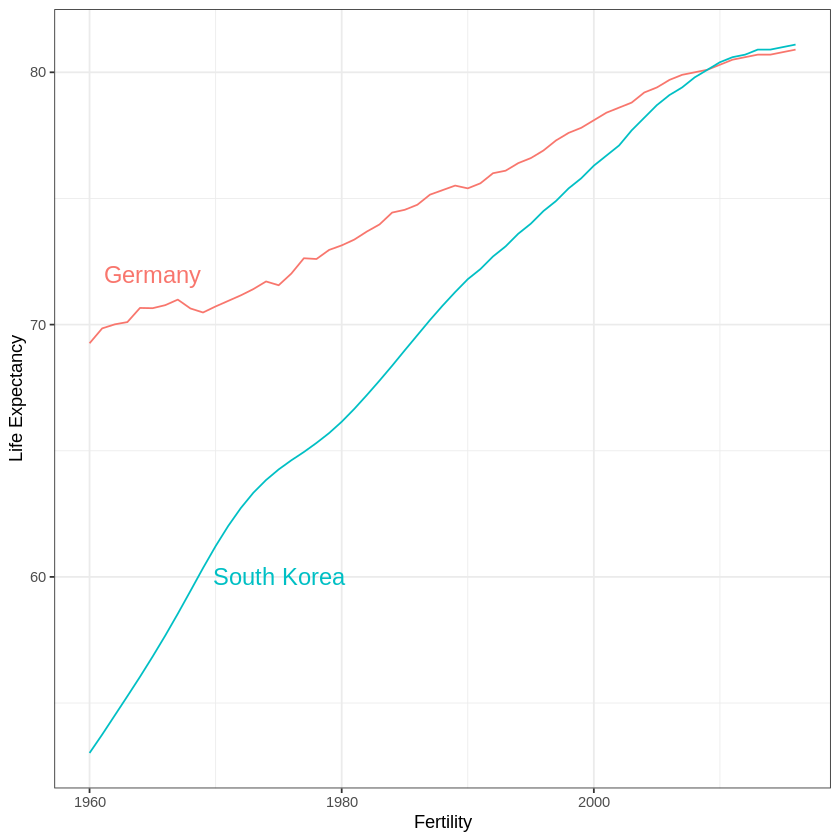

In [35]:
# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none") +
    ylab("Life Expectancy") +
    xlab("Fertility")